In [9]:
# Import libraries and dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
sns.set(style="ticks")

In [10]:
# See visualizations made in notebook

%matplotlib inline

In [13]:
ecomm = pd.read_csv("Ecommerce_Customers.csv")
ecomm.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
print(ecomm.info())
print(ecomm.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB
None
       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
m

### Exploratory Data Analysis

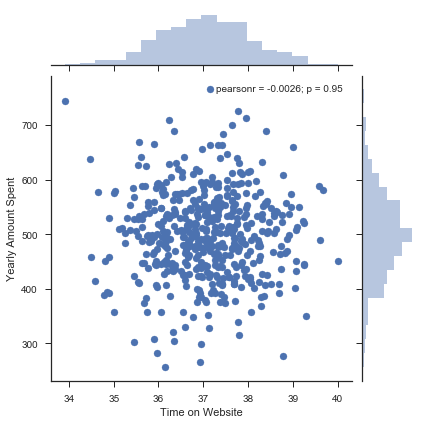

In [15]:
# Create joint plot to compare Time on Website and Yearly Amount Spent columns to see if the correlation makes sense.

x, y = ecomm["Time on Website"], ecomm["Yearly Amount Spent"]
sns.jointplot(x, y, data = None, kind = "scatter")

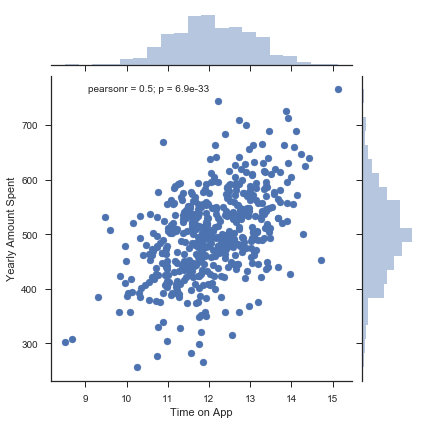

In [16]:
# Now we'll check the Time on App column instead

x1, y1 = ecomm["Time on App"], ecomm["Yearly Amount Spent"]
sns.jointplot(x1, y1, data = None, kind = "scatter")

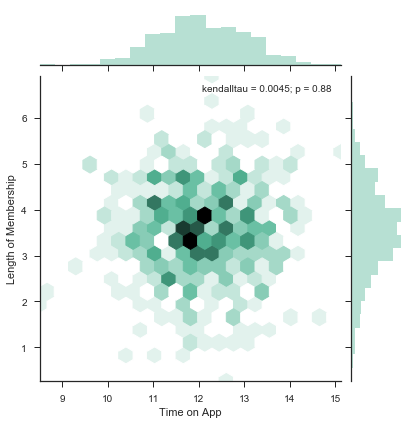

In [17]:
# Created a jointplot with a 2D hex bin plot comparing Time on App and Length of Membership

x2, y2 = ecomm["Time on App"], ecomm["Length of Membership"]
sns.jointplot(x2, y2, kind="hex", stat_func=kendalltau, color="#4CB391")

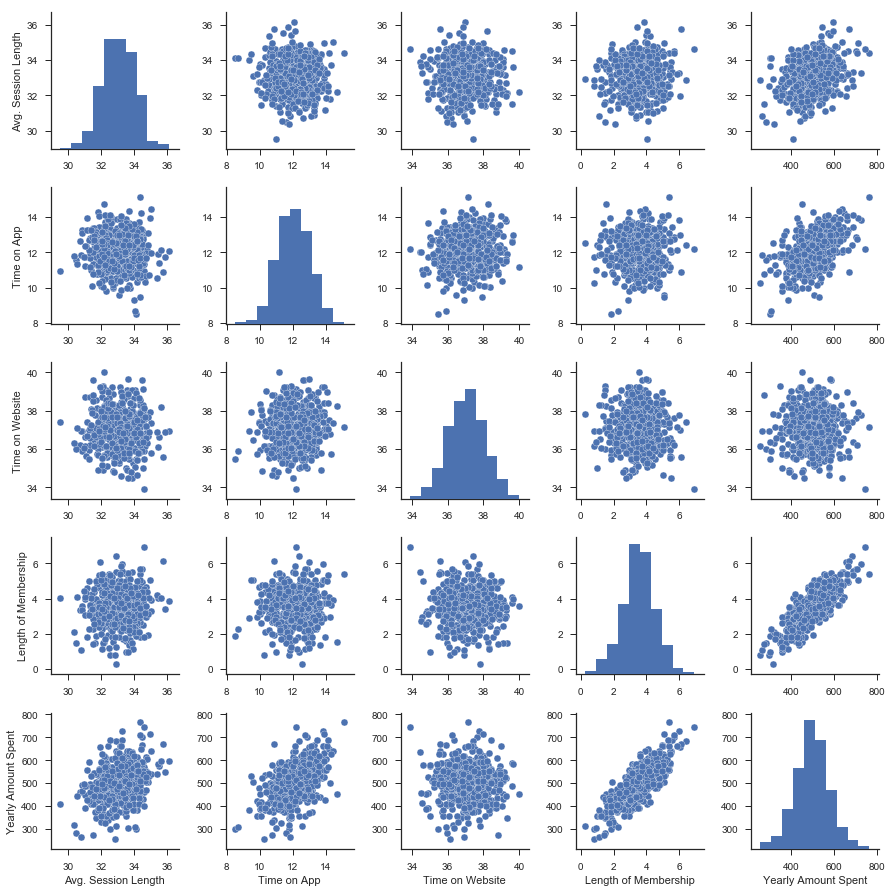

In [18]:
# Explore relationships across entire data set using pairplot

sns.pairplot(ecomm)

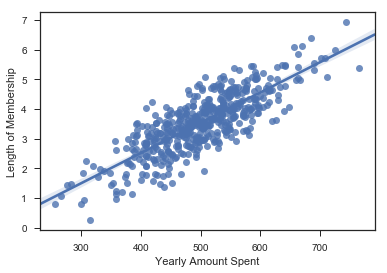

In [19]:
# Linear model plot of Yearly Amount Spent vs. Length of Membership

x3, y3 = ecomm["Yearly Amount Spent"], ecomm["Length of Membership"]
sns.regplot(x= x3, y= y3 , data= ecomm)

### Training and Test Data

In [20]:
ecomm.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [21]:
X = ecomm[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

y = ecomm["Yearly Amount Spent"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
model_cf = model.coef_
model_cf

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [27]:
model_df = pd.DataFrame(model_cf, X.columns, columns = ["Coefficients"])
model_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data

In [28]:
model_predict = model.predict(X_test)

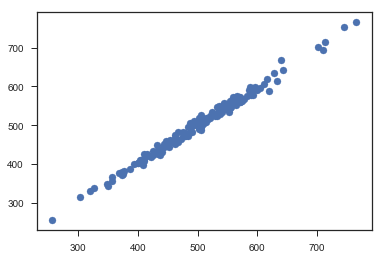

In [29]:
plt.scatter(y_test, model_predict)

## Evaluating the Model

In [30]:
# Import metrics for calculating the residual sum of squares and the explained variance score

from sklearn import metrics

In [31]:
# Calculating the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error

MAE = metrics.mean_absolute_error(y_test, model_predict)
MSE = metrics.mean_squared_error(y_test, model_predict)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, model_predict))

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  7.22814865343
MSE:  79.813051651
RMSE:  8.93381506698


In [32]:
metrics.explained_variance_score(y_test, model_predict)

0.98907712318896057

## Residuals

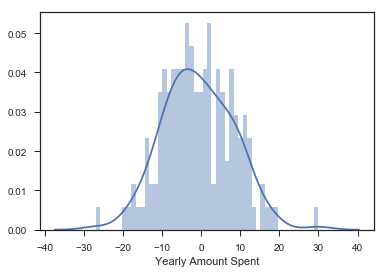

In [33]:
sns.distplot((y_test - model_predict), bins = 50)

In [34]:
pd.DataFrame(model_cf, X.columns, columns = ["Coefficients"])

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [35]:
print("Weight coefficients: ", model.coef_)
print("Height intercepts: ", model.intercept_)

Weight coefficients:  [ 25.98154972  38.59015875   0.19040528  61.27909654]
Height intercepts:  -1047.93278225


In [36]:
# Find the min and max for X and y

x_min = X.min()
x_max = X.max()

y_min_actual = y.min()
y_max_actual = y.max()

In [38]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print("\n")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 256.67058229005585
Calculated Min Value: Avg. Session Length     469.280357
Time on App             207.737844
Time on Website         523.785307
Length of Membership    105.253801
dtype: float64


Actual Max Value: 765.5184619388373
Calculated Max Value: Avg. Session Length     551.474502
Time on App             290.076401
Time on Website         599.561654
Length of Membership    188.014648
dtype: float64


ValueError: x and y must be the same size

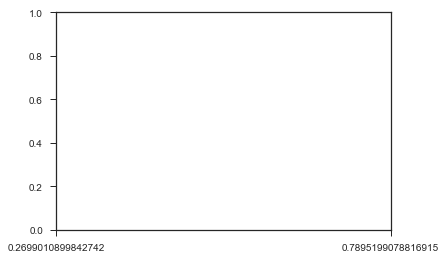

In [42]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')